# Домашнее задание 2
## На курсе Анализ данных в Python (Социология)
### Темы: предобработка данных для модели, линейная регрессия, регуляризация, оптимизация гиперпараметров, классификация и логистическая регрессия, SGD

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Если вопрос задается конкретно, то предполагается, что вы дадите комментарии.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sklearn as sklearn

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Чтобы данные получались одининаковые при запуске на другом устройстве. Сид задает параметры рандомизации`

# **Часть 1 | EDA и визуализация** (готово)

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ


## **Простейший EDA и обработка признаков (4.5 балла)** (готово)

In [549]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (1.65 балла)** (готово)

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


In [550]:
# Your code here
print(df_train.sample(10))

                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   

In [551]:
print(pd.concat([df_train.head(), df_train.tail()]))

                               name  year  selling_price  km_driven    fuel  \
0            Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
6994              Hyundai i20 Magna  2013         320000     110000  Petrol   
6995          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997                Tata Indigo CR4  2013         290000      25000  Diesel   
6998                Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
0     Individual       Manual           First Owner   

In [552]:
print(df_train.columns[df_train.isnull().any()].tolist())

['mileage', 'engine', 'max_power', 'torque', 'seats']


In [553]:
print(df_train[df_train.duplicated()])

                                          name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
326             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
...                                        ...   ...            ...   
6880             Renault Captur 1.5 Diesel RXT  2018        1265000   
6881                  Maruti Ciaz Alpha Diesel  2019        1025000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [554]:
# your code here

# Заполнение пропусков медианами для числовых столбцов
for column in df_train.select_dtypes(include='number').columns:
    if df_train[column].isnull().any():
        df_train[column].fillna(df_train[column].median(), inplace=True)

# Проверка, что пропусков больше нет
print(df_train.isnull().sum())



for column in df_test.select_dtypes(include='number').columns:
    if df_test[column].isnull().any():
        df_test[column].fillna(df_test[column].median(), inplace=True)


print(df_test.isnull().sum())

#Остались пропуски в колонках, которые распознаются как текстовые

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats              0
dtype: int64
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats             0
dtype: int64


C:\Users\zalts\AppData\Local\Temp\ipykernel_17884\45771482.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[column].fillna(df_train[column].median(), inplace=True)
C:\Users\zalts\AppData\Local\Temp\ipykernel_17884\45771482.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

### **Задание 2 (1.5 балла)** (готово)

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить)Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [555]:
features = df_train.drop(columns=['selling_price'])
duplicates = df_train[features.duplicated()]
print(len(duplicates))

1159


In [556]:
duplicates

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [557]:
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')

In [558]:
df_train = df_train.reset_index(drop=True)

In [559]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.75 балла)** (готово)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [560]:
# your code here
df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])

In [561]:
# Преобразование для всего кроме столбца max_power в train (см. ниже)

df_train['mileage'] = df_train['mileage'].str.split().str[0].astype(float)
df_train['engine'] = df_train['engine'].str.split().str[0].astype(float)

df_test['mileage'] = df_test['mileage'].str.split().str[0].astype(float)
df_test['engine'] = df_test['engine'].str.split().str[0].astype(float)
df_test['max_power'] = df_test['max_power'].str.split().str[0].astype(float)

In [562]:
# 
# При выполнении строки вылезает ошибка "could not convert string to float: 'bhp'". Значит где-то в заполнении бз были ошибки

# найдем строки, в которых осталось bhp. Это строка 3586
df_train['max_power'].str.split().str[0].sort_values(ascending=False)

df_train.iloc[3586]

# Следует заменить bhp на пропуск

df_train.loc[3586, 'max_power'] = None

df_train.iloc[3586]

# Все в порядке, теперь можно разобраться с max_power

df_train['max_power'] = df_train['max_power'].str.split().str[0].astype(float)

In [563]:
df_train.info()

df_test.info()

assert df_train.shape == (5840, 12), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

# В задании не сказано менять пропуски на этом этапе, значит не будем этого делать

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   float64
 9   engine         5654 non-null   float64
 10  max_power      5656 non-null   float64
 11  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name          

### **Задание 4 (0.3 балла)** (готово)

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [564]:
# your code here

df_train['engine'] = df_train['engine'].astype(int, errors='ignore')
df_train['seats'] = df_train['seats'].astype(int, errors='ignore')



### **Задание 5 (0.3 балла)** (готово)

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [565]:
# your code here

df_train.describe(include='all')


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,5840,5840.000000,5.840000e+03,5.840000e+03,5840,5840,5840,5840,5654.000000,5654.000000,5656.000000,5840.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,91,NaN,NaN,NaN,3177,5223,5336,3603,NaN,NaN,NaN,NaN
mean,NaN,2013.428425,5.229601e+05,7.395224e+04,NaN,NaN,NaN,NaN,19.432842,1435.418111,88.103070,5.426712
std,NaN,4.095622,5.354320e+05,6.007114e+04,NaN,NaN,NaN,NaN,4.051002,492.453262,32.131943,0.982344
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,2.000000
25%,NaN,2011.000000,2.500000e+05,3.900000e+04,NaN,NaN,NaN,NaN,16.800000,1197.000000,68.000000,5.000000
50%,NaN,2014.000000,4.050000e+05,7.000000e+04,NaN,NaN,NaN,NaN,19.370000,1248.000000,81.860000,5.000000
75%,NaN,2017.000000,6.400000e+05,1.000000e+05,NaN,NaN,NaN,NaN,22.320000,1498.000000,100.000000,5.000000


In [566]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981.000000,981.000000,981.000000,1000.000000
unique,621,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,NaN,NaN,NaN,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,19.338206,1458.882773,91.015627,5.403000
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,3.989872,526.228560,35.207383,0.912921
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,0.000000,624.000000,34.200000,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,16.500000,1197.000000,69.000000,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,19.330000,1248.000000,83.100000,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,22.320000,1582.000000,102.000000,5.000000


In [567]:
# Проверка того, что все сделали правильно

assert df_train.shape == (5840, 12), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

## **Визуализации (3 балла)** (готово)



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (1.5 балла)** (готово)

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

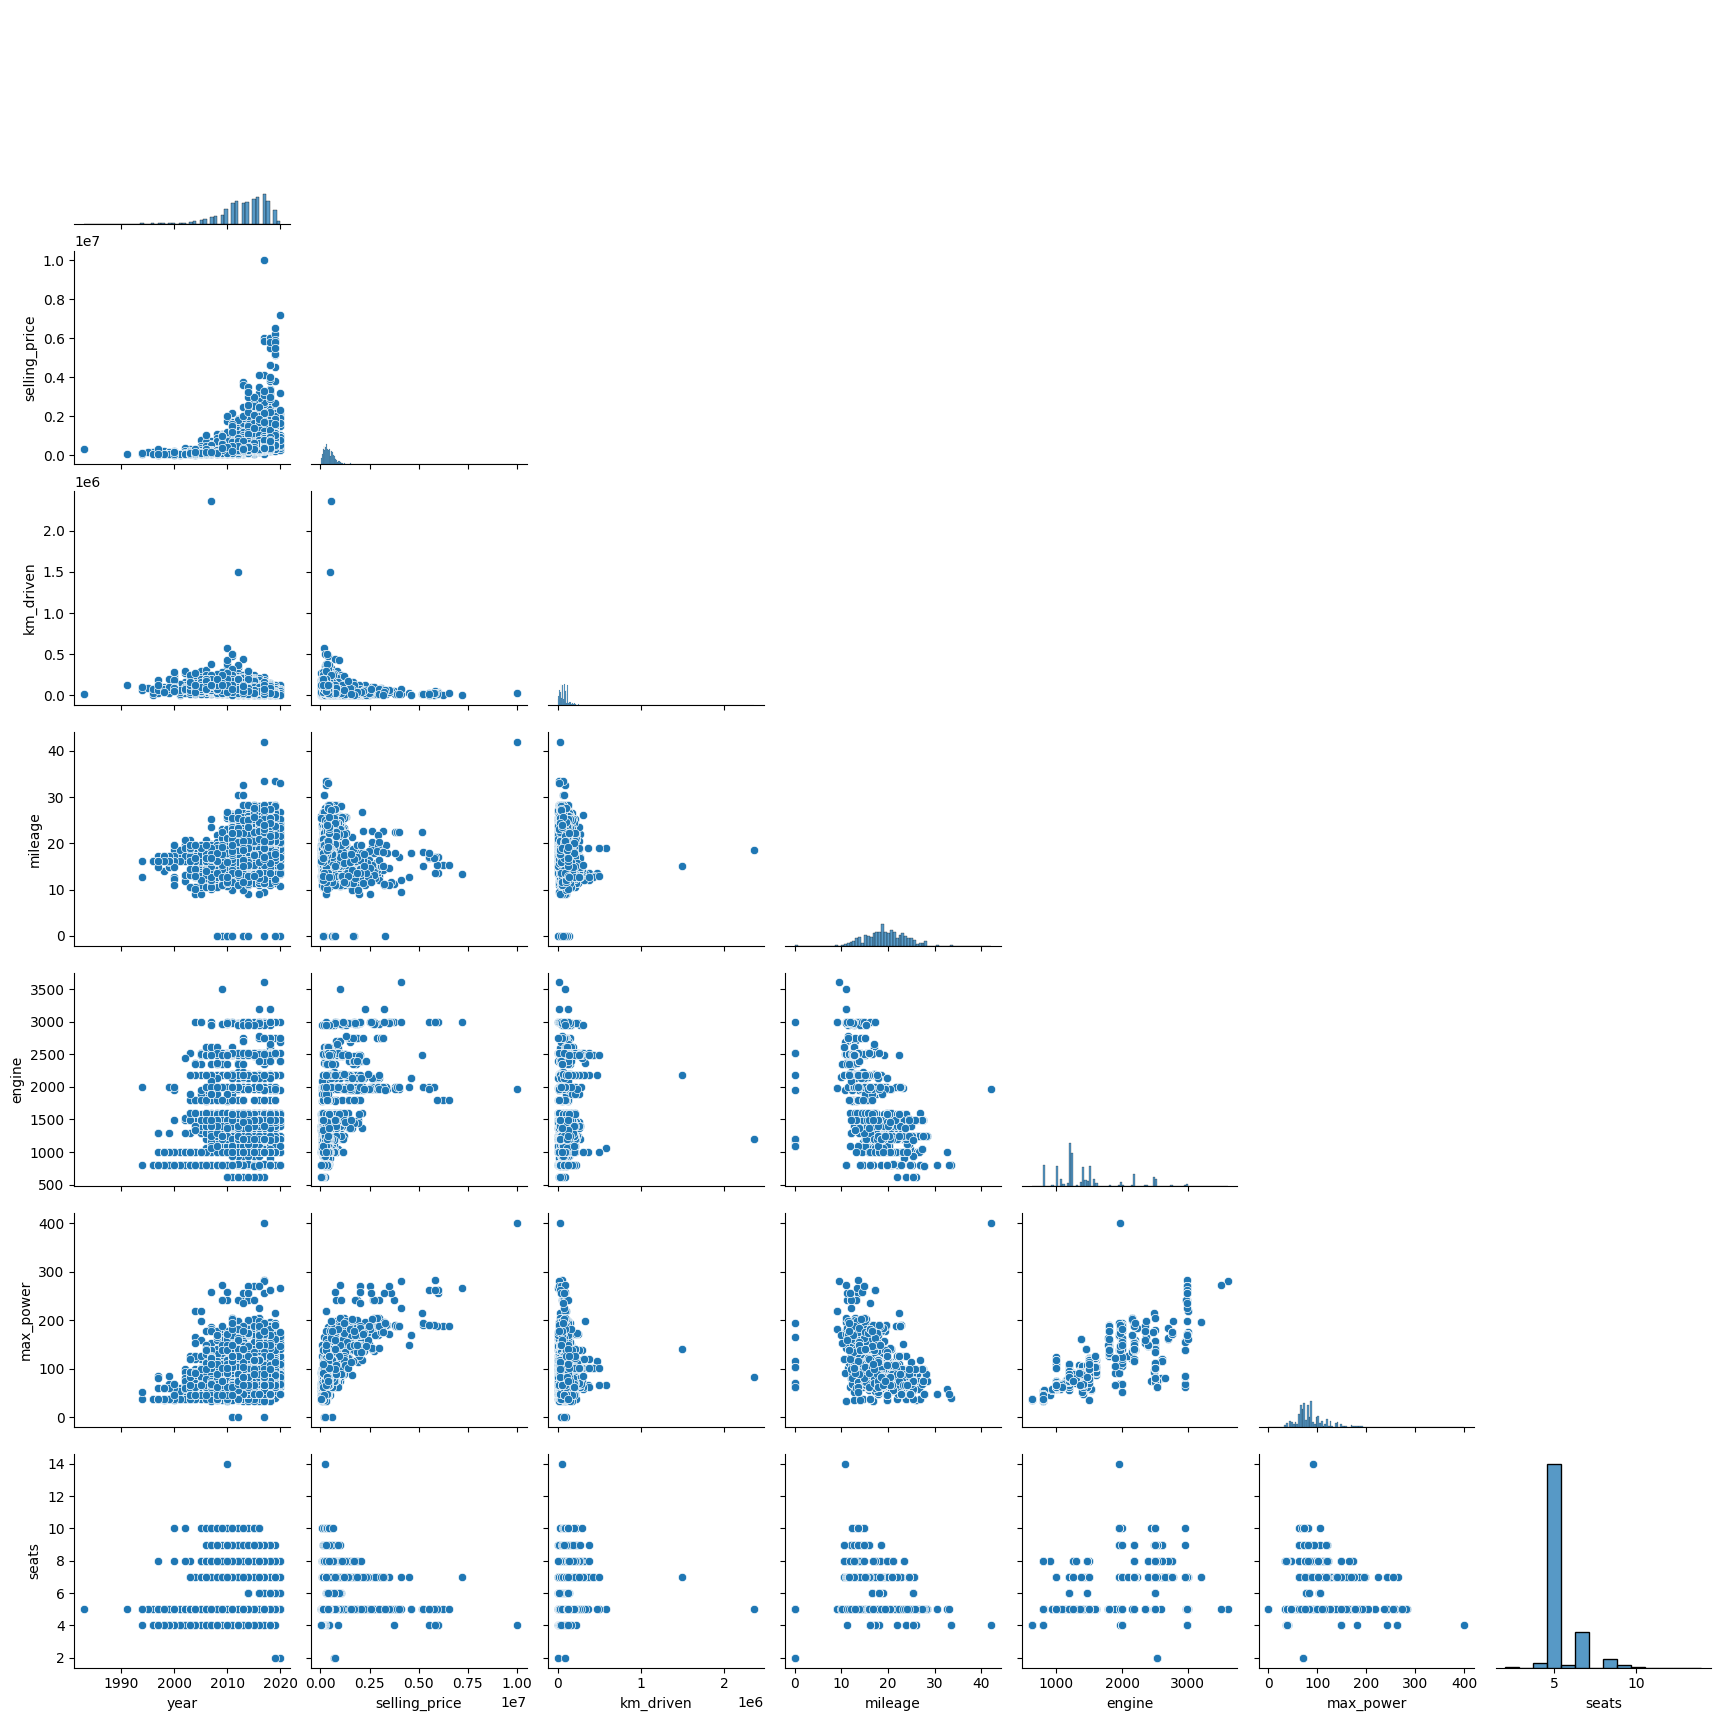

In [568]:
# your code here
sns.pairplot(data=df_train, corner=True);

`Ответ`

Можно предположить наличие связи selling_price с max_power, km_driven. С меньшей вероятностью есть связь с engine и seats. Корреляция с milage скорее всего будет самой низкой

Гипотезы о корреляциях:
- selling_price/seats - отрицательная
- selling_price/max_power - положительная
- selling_price/engine - положительная
- selling_price/mileage - если есть, то отрицательная
- selling_price/km_driven - отрицательная

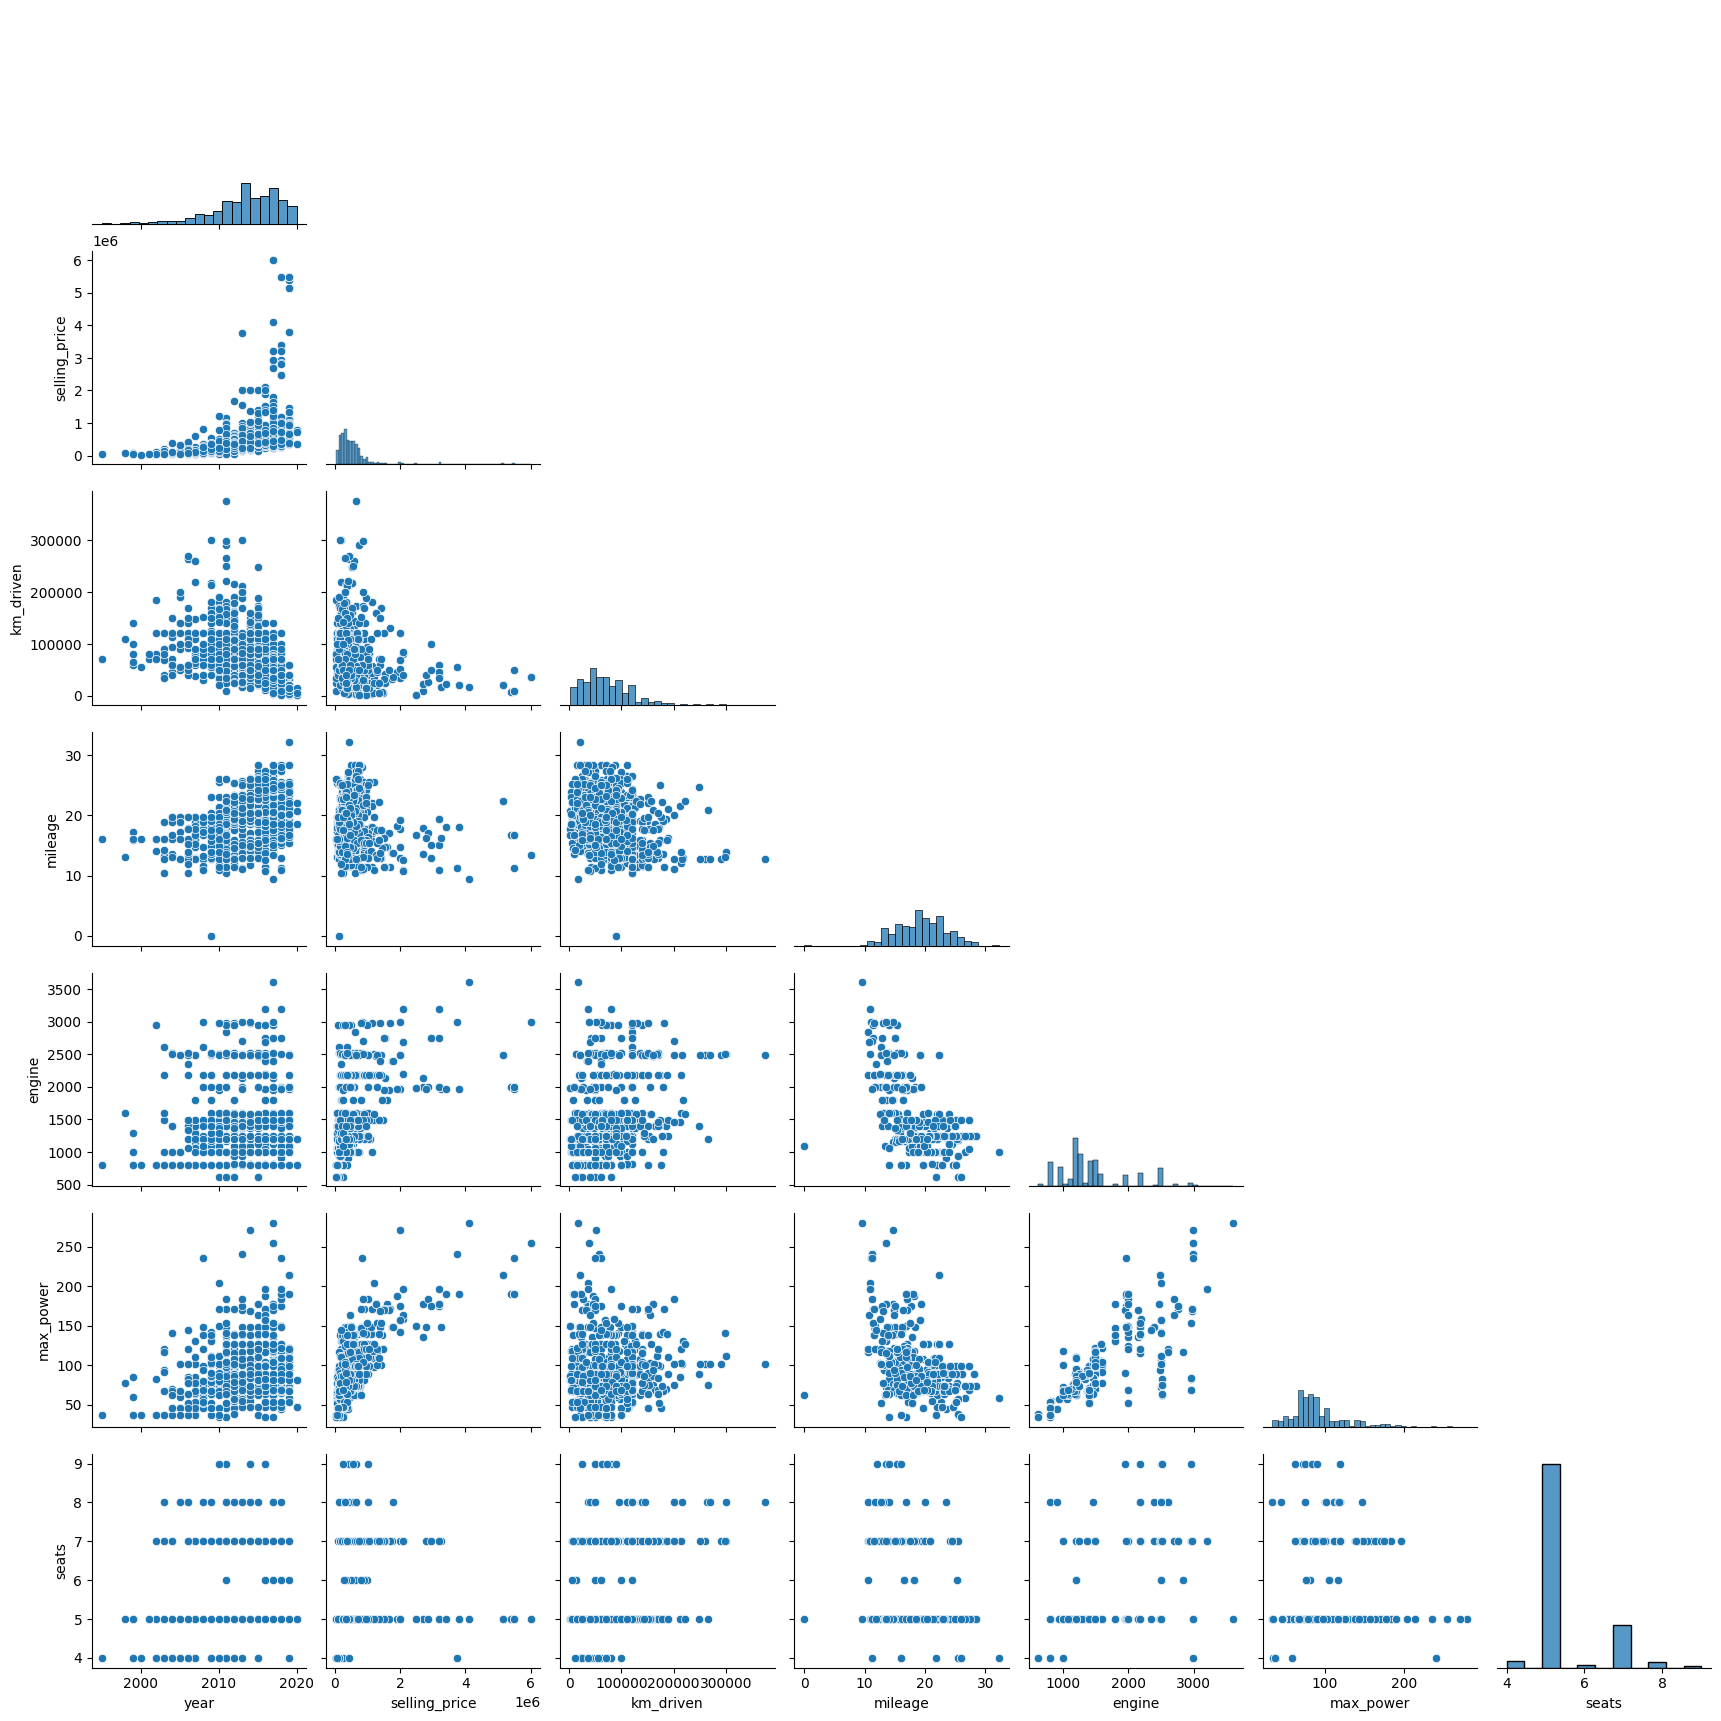

In [569]:
# your code here
sns.pairplot(data=df_test, corner=True);

`Все распределения имеют похожую форму, гипотезы о корреляциях остаются теми же, даже кажутся еще более правдоподобными`

### **Задание 7 (1.5 балла)** (готово)

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


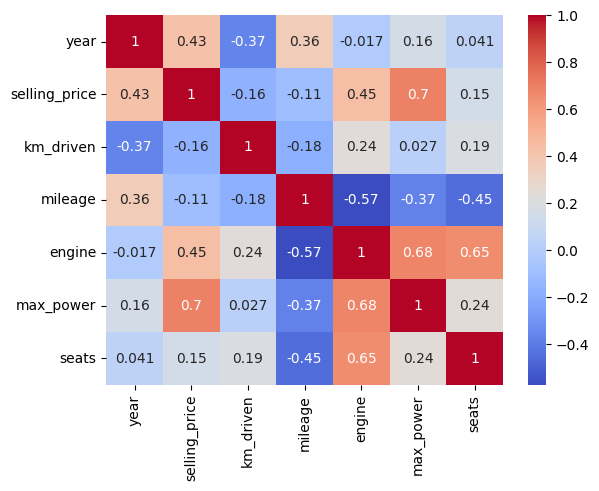

In [570]:
# your code here
corr_matrix = df_train.select_dtypes(include=['number']).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm');

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Ответ`
- Наименее скореллированы year/engine (-0.017)
- будем считать сильной +корреляцией значения больше 0.65, тогда сильно скоррелированы только max_power/selling_price, engine/seats и engine/max_power
- наблюдается слабая отрицательная корреляция (-0.37), так что со значительной долей осторожности можно сказать что такая связь есть

# **Часть 2 | Модель только на вещественных признаках (6.25 балла)** (готово)

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.25 балла)** (готово)

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [571]:
# Все-таки надо заполнить пропуски, потому что иначе мы не сможем построить регрессию. Так как ранее мы заполняли пропуски медианой, также поступим и теперь

for column in df_train.select_dtypes(include='number').columns:
    if df_train[column].isnull().any():
        df_train[column].fillna(df_train[column].median(), inplace=True)

# Проверка, что пропусков больше нет
print(df_train.isnull().sum())


for column in df_test.select_dtypes(include='number').columns:
    if df_test[column].isnull().any():
        df_test[column].fillna(df_test[column].median(), inplace=True)

# Проверка, что пропусков больше нет
print(df_test.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


C:\Users\zalts\AppData\Local\Temp\ipykernel_17884\1438357049.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[column].fillna(df_train[column].median(), inplace=True)
C:\Users\zalts\AppData\Local\Temp\ipykernel_17884\1438357049.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [572]:
df_train_filtered = df_train.select_dtypes(exclude=['object', 'category'])

y_train = df_train_filtered['selling_price']
X_train = df_train_filtered.drop(columns=['selling_price']) 

X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       5840 non-null   int64  
 1   km_driven  5840 non-null   int64  
 2   mileage    5840 non-null   float64
 3   engine     5840 non-null   float64
 4   max_power  5840 non-null   float64
 5   seats      5840 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 273.9 KB


In [573]:
assert X_train.shape == (5840, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

In [574]:
df_test_filtered = df_test.select_dtypes(exclude=['object', 'category'])


y_test = df_test_filtered['selling_price']
X_test = df_test_filtered.drop(columns=['selling_price']) 

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1000 non-null   int64  
 1   km_driven  1000 non-null   int64  
 2   mileage    1000 non-null   float64
 3   engine     1000 non-null   float64
 4   max_power  1000 non-null   float64
 5   seats      1000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 47.0 KB


In [575]:
assert X_test.shape == (1000, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

### **Задание 9 (1 балл)** (готово)

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [576]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

# обучение
model = LinearRegression()

model.fit(X_train, y_train)

# Предсказание для трейна и теста
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [577]:

# Оценки
mse_train = MSE(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = MSE(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f'Train MSE: {mse_train}, Train R^2: {r2_train}')
print(f'Test MSE: {mse_test}, Test R^2: {r2_test}')

Train MSE: 116874153930.02876, Train R^2: 0.5922591702157309
Test MSE: 233298786264.12756, Test R^2: 0.5941419681125448


`Ответ`
Объясняющая сила модели на обеих выборках средняя, 59.23% и 59.41%.
На тестовой выборке MSE оказывается в два раза больше, чем на тренировочной, что может говорить о неустойчивости модели при переносе ее на другие данные. Возможно имеет место некоторая степень переобученности.

### **Задание 10 (0.75 балла)** (готово)

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [578]:
from sklearn.preprocessing import StandardScaler



# your code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [579]:
model_1 = LinearRegression()

model_1.fit(X_train_scaled, y_train)

y_train_pred = model_1.predict(X_train_scaled)
y_test_pred = model_1.predict(X_test_scaled)

# Оценки
mse_train = MSE(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = MSE(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f'Train MSE: {mse_train}, Train R^2: {r2_train}')
print(f'Test MSE: {mse_test}, Test R^2: {r2_test}')

type(X_train)

Train MSE: 116874153930.0289, Train R^2: 0.5922591702157305
Test MSE: 233298786264.12024, Test R^2: 0.5941419681125575


pandas.core.frame.DataFrame

`Ответ` Модель отличается букально на единицы MSE и сотые тысяч R^2

### **Задание 11 (0.5 балла)** (готово)

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [580]:
# your code here
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {model_1.coef_[i]}")

year: 152772.5708458141
km_driven: -44158.81852005271
mileage: 28833.92577751717
engine: 61178.49433684747
max_power: 322807.3532592337
seats: -23209.132485997394


`Ответ`

Наиболее значимый предиктор - max_power со значением 322807.353

### **Задание 12 (1.25 балла)** (готово)

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [581]:
from sklearn.linear_model import Lasso

# your code here
# Построение модели
model_2 = Lasso()

model_2.fit(X_train_scaled,y_train)

y_train_pred = model_2.predict(X_train_scaled)
y_test_pred = model_2.predict(X_test_scaled)

# Оценки
mse_train = MSE(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = MSE(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f'Train MSE: {mse_train}, Train R^2: {r2_train}')
print(f'Test MSE: {mse_test}, Test R^2: {r2_test}')

Train MSE: 116874153940.1429, Train R^2: 0.5922591701804456
Test MSE: 233299457812.3697, Test R^2: 0.5941407998542259


In [582]:
# your code here
# Вывод значений
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {model_2.coef_[i]}")

year: 152772.39021419562
km_driven: -44157.689857942605
mileage: 28832.04339588388
engine: 61173.66240922125
max_power: 322808.23691946967
seats: -23206.25564908013


`Ответ`
Модель не занулила ни одну из переменных. Значения предикторов (как и метрики модели) снова особо не поменялись).

Вероятно модель не занулила ничего потому что все предикторы значимы. В целом все значения Bi довольно большие учитывая тот факт что они построены на нормализованных данных.

### **Задание 13 Финальный рывок (2.5 балла)** (готово)

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:** (готово)

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [584]:
from sklearn.model_selection import GridSearchCV


# your code here
# Перебор для Lasso

Lasso().get_params() # Какие параметры мы можем менять? Реально что-то значит только альфа

param_grid = {'alpha':[0.1,1,5,10,50,100]} # Задаем варианты альфы

model_3 = GridSearchCV(estimator=Lasso(), # какая модель
                          param_grid=param_grid, 
                          scoring='neg_mean_squared_error',
                          cv=10, # количество фолдов
                          verbose=2)

model_3.fit(X_train_scaled,y_train)
# Получили что лучшое alpha = 100. Построим модель


y_train_pred = model_3.predict(X_train_scaled)
y_test_pred = model_3.predict(X_test_scaled)

# Оценки
mse_train = MSE(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = MSE(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f'Train MSE: {mse_train}, Train R^2: {r2_train}')
print(f'Test MSE: {mse_test}, Test R^2: {r2_test}')

for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {model_3.best_estimator_.coef_[i]}")


Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END .......................................

`Ответ`

- мы обучили 6*10 (6 вариантов alpha * 10 фолдов) = 60 моделей
- коэффициент регуляризации alpha = 100
- Наша модель настолько НЕПРОБИВАЕМАЯ, что ни один коэффициент не занулился. Вообще мало что поменялось.

**Ваша задача 2:** (готово)

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [597]:
from sklearn.linear_model import ElasticNet

# your code here
ElasticNet().get_params()

param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]} # Берем больше 0 и до 1, так как модель с 0 это L1 модель

model_4 = GridSearchCV(estimator=ElasticNet(),
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10,
                          verbose=2)

model_4.fit(X_train_scaled,y_train)

print(model_4.best_estimator_)

y_train_pred = model_4.predict(X_train_scaled)
y_test_pred = model_4.predict(X_test_scaled)

# Оценки
mse_train = MSE(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = MSE(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f'Train MSE: {mse_train}, Train R^2: {r2_train}')
print(f'Test MSE: {mse_test}, Test R^2: {r2_test}')

for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {model_3.best_estimator_.coef_[i]}")



Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1

`Ответ`
- грид серч обучил 6*7*10 моделей = 420 (перебираем все вариаци гиперпараметров и умножаем на количество фолдов)
- Лучшая модель: alpha = 1, l1_ratio = 0.99

Не то чтобы и эта модель сильно изменилась, наоборот, изменения продолжают исчисляться буквально копейками


# **Часть 3| Добавляем категориальные фичи (3.75 балла)**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.5 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
1. Удалить столбец`name`
2. Снова объединить категориальные с вещественными признаками.

In [ ]:
# your code here
df_train['name'].describe()
# Сложно сказать что-то о name. Переменная обозначает имена, анализ не говорит ничего нового и подтверждает это. Хорошо, что много уникальных значений, и топ встречается всего 91 раз - значит ни одна вариация не доминирует.


ИЗМЕНИ КОД!!!!
df_train_filtered = df_train.select_dtypes(exclude=['object', 'category'])

y_train = df_train_filtered['selling_price']
X_train = df_train_filtered.drop(columns=['selling_price']) 

X_train.info()



count                       5840
unique                      1924
top       Maruti Swift Dzire VDI
freq                          91
Name: name, dtype: object

### **Задание 15 (2 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

### **Задание 16 (1.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# **Часть 4 (7 баллов) | Классификация**



In [ ]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


d:\My files\Programming projects\python_hse_hw2_rep\venv\Lib\site-packages\IPython\core\magics\pylab.py:166: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### **Задание 13 (2 балла)**
Обучите логистическую регрессию на синтетических данных.

In [ ]:
# your code here

На тестовой части посчитайте ROC-AUC, PR-AUC. Самостоятельно изучите, что такое PR-AUC.

Постройте ROC и PR кривые. Проинтерпретируйте результат.

In [ ]:
# your code here

### **Задание 14 (2 балла)**

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет.

In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

Посчитайте качество (выведите все метрики классификации) на train и test при применении логистической регрессии.

In [ ]:
# your code here

### **Задание 15 (2 балла)**

Закодируйте все категориальные признаки с помощью one-hot-кодирования, а числовые признаки масштабируйте. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до предобработки). Измерьте время, потребовавшееся на обучение модели. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [ ]:
# your code here

### **Задание 16 (1 балла)**

Давайте попробуем использовать SGDClassifier для улучшения качества модели. Улучшились ли метрики и качество в целом на трейне и тесте? Используйте GreedSearchCV

In [ ]:
# your code here